In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_excel("/content/winequality-red.xlsx")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


(array([ 10.,  53., 681., 638., 199.,  18.]),
 array([3.        , 3.83333333, 4.66666667, 5.5       , 6.33333333,
        7.16666667, 8.        ]),
 <BarContainer object of 6 artists>)

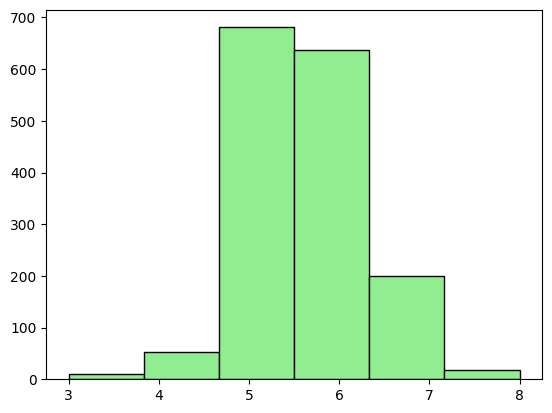

In [13]:
plt.hist(df["quality"],bins=6,color="lightgreen",edgecolor="black")

<Axes: xlabel='volatile acidity', ylabel='Density'>

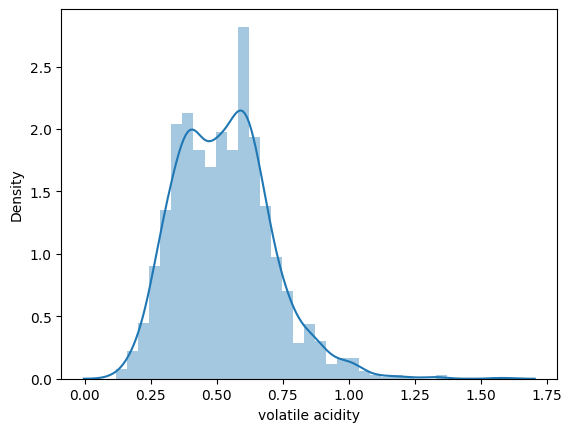

In [14]:
sns.distplot(df["volatile acidity"])

<Axes: >

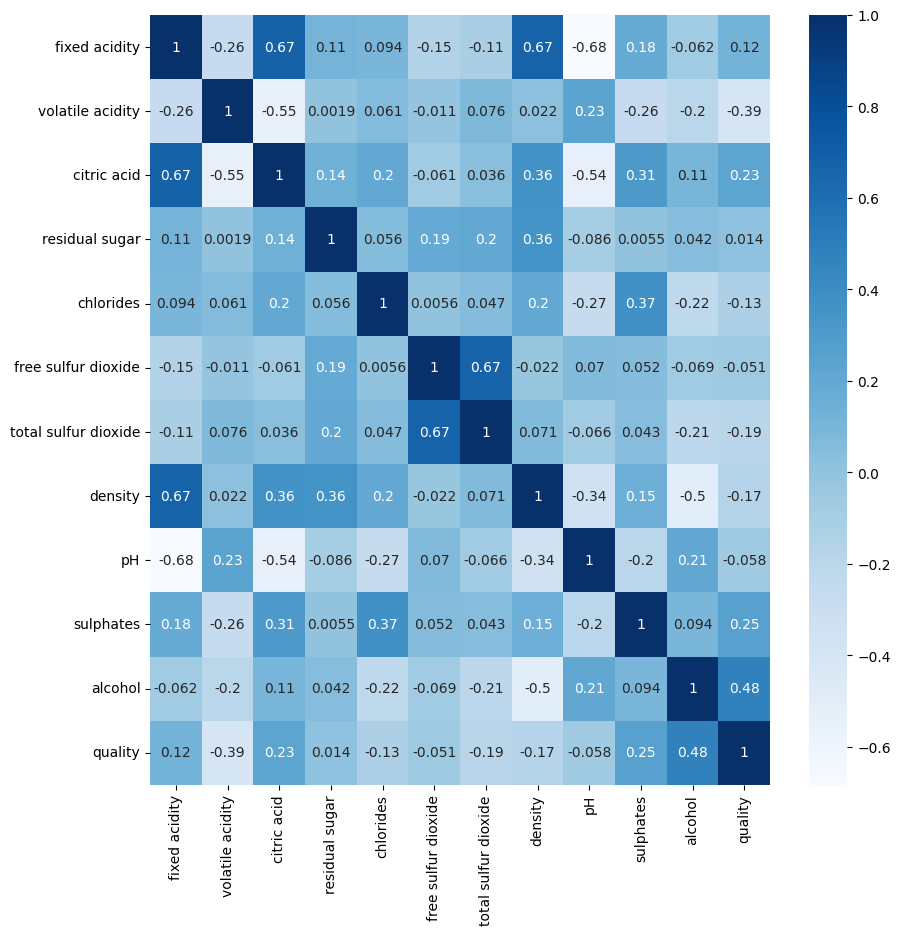

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap="Blues")

In [18]:
df["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [19]:
df["quality"]=df["quality"].replace(8,7)
df["quality"]=df["quality"].replace(3,5)
df["quality"]=df["quality"].replace(4,5)

In [21]:
df["quality"].value_counts()

5    744
6    638
7    217
Name: quality, dtype: int64

In [22]:
x=df.drop("quality",axis=1)
y=df[["quality"]]

In [23]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.20,random_state=5)
x_train.shape,y_train.shape

((1279, 11), (1279, 1))

In [26]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion="entropy")
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [36]:
dt.score(x_train,y_train)

1.0

In [37]:
dt.score(x_test,y_test)

0.71875

The training accuracy is 100% while testing accuracy is 71.87% which means that the model is overfitting.
Hence we are pruning the tree to max depth 4
(Pruning a decision tree is a technique used to prevent overfitting and improve the generalization ability of the model.)

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
dt_pruned=DecisionTreeClassifier(criterion="entropy",random_state=50,max_depth=4,min_samples_leaf=6)
dt_pruned.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=6,
                       random_state=50)

In [45]:
ind_var=df.drop("quality",axis=1)
feature_var=ind_var.columns

In [48]:
feature_var

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [50]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix

In [52]:
y_pruned=dt_pruned.predict(x_test)
y_pruned_train=dt_pruned.predict(x_train)
print(accuracy_score(y_test,y_pruned))
print(accuracy_score(y_train,y_pruned_train))

0.63125
0.6364347146207975


The accuracy score on the test dataset (0.63125) is slightly lower than the accuracy score on the training dataset (0.6364). This indicates that the pruned decision tree model generalizes reasonably well to unseen data.
The fact that the accuracy on the test data is close to the accuracy on the training data suggests that the model is not significantly overfitting the training data.

In [53]:
acc_dt=accuracy_score(y_test,y_pruned)
acc_dt

0.63125

The overfitting has been handled but accuracy has not improved

we are now getting the sig features for our dataset


In [55]:
feature_imp=dt_pruned.tree_.compute_feature_importances(normalize=False)
feat_imp_dict=dict(zip(feature_var,dt_pruned.feature_importances_))
feat_imp=pd.DataFrame.from_dict(feat_imp_dict,orient="index")
feat_imp.sort_values(by=0,ascending=True)

,0
citric acid,0.000000
residual sugar,0.000000
chlorides,0.000000
density,0.000000
pH,0.000000
total sulfur dioxide,0.025839
free sulfur dioxide,0.036360
fixed acidity,0.089209
volatile acidity,0.100496
sulphates,0.266467


In [56]:
resultsdt=pd.DataFrame({"Method":["Decision Tree"], "accuracy":acc_dt})
resultsdt=resultsdt[["Method","accuracy"]]
resultsdt

,Method,accuracy
0,Decision Tree,0.63125


we will apply random forest now

In [58]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=50)
rf=rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)
acc_rf=accuracy_score(y_test,rf_pred)
resultsrf=pd.DataFrame({"Method":["Random Forest"],"accuracy":acc_rf})
resultsrf=resultsrf[["Method","accuracy"]]
resultsrf

,Method,accuracy
0,Random Forest,0.746875


Implement Adaboost Algorithm

In [62]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=150,learning_rate=0.05,random_state=5)
model=ada.fit(x_train,y_train)
ada_pred=model.predict(x_test)
acc_ada=accuracy_score(y_test,ada_pred)
resultsada=pd.DataFrame({"Method":["AdaBoost"],"accuracy":acc_ada})
resultsada=resultsada[["Method","accuracy"]]
resultsada

,Method,accuracy
0,AdaBoost,0.63125


Bagging

In [63]:
from sklearn.ensemble import BaggingClassifier
bag=BaggingClassifier(n_estimators=55,max_samples=.5,bootstrap=True,oob_score=True,random_state=5)
model=bag.fit(x_train,y_train)
bag_pred=model.predict(x_test)
acc_bag=accuracy_score(y_test,bag_pred)
resultsbag=pd.DataFrame({"Method":["Bagging"],"accuracy":acc_bag})
resultsbag=resultsbag[["Method","accuracy"]]
resultsbag

,Method,accuracy
0,Bagging,0.734375


Gradient Boosting

In [64]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(n_estimators=60,learning_rate=0.05,random_state=5)
model=gbc.fit(x_train,y_train)
gbc_pred=model.predict(x_test)
acc_gbc=accuracy_score(y_test,gbc_pred)
resultsgbc=pd.DataFrame({"Method":["Gradient Boosting"],"accuracy":acc_gbc})
resultsgbc=resultsgbc[["Method","accuracy"]]
resultsgbc

,Method,accuracy
0,Gradient Boosting,0.6625


We can deduce that random forest has given us the best accuracy as compared to other algorithm.